Bienvenue dans ce projet portant sur la dataset "diabetes.csv" 

# **CONTEXT**


> 
  **Diabetes is a chronic disease that affects a large number of people worldwide**. Collecting and analyzing data on this disease can help healthcare professionals better understand risk factors and symptoms, and develop more effective treatment methods.
> 
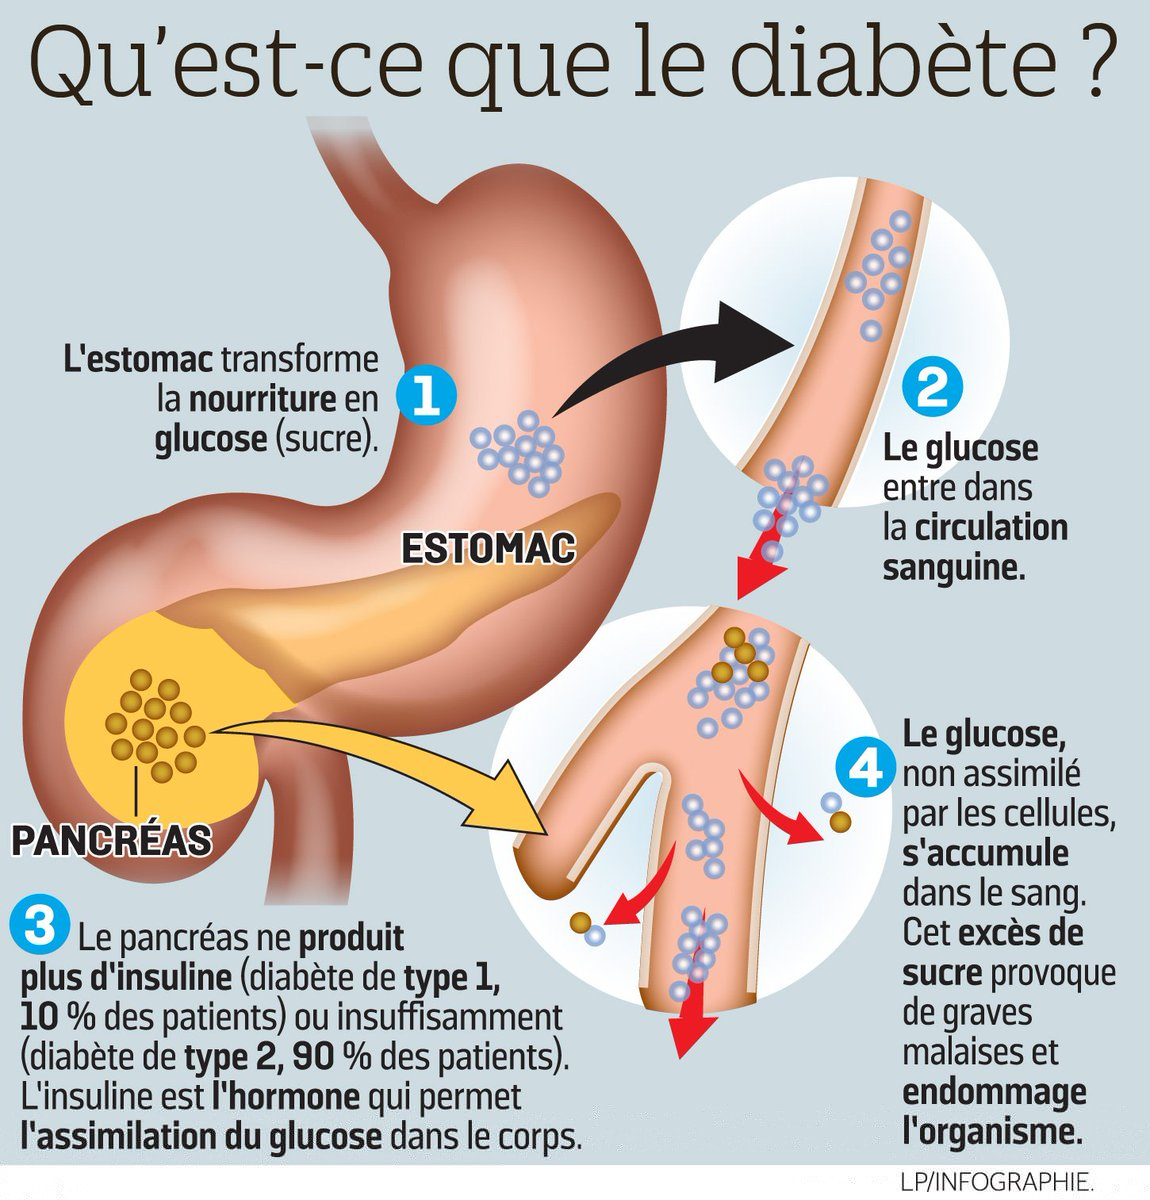

This data set originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases.
The aim of the dataset is to predict diagnostically whether a patient has diabetes, based on certain diagnostic measures included in the dataset.
Several constraints were imposed
on the selection of these instances from a larger database. In particular, all patients here are women
be at least 21 years old and of Pima Indian origin.2
From the dataset in the file (.csv), we can find several variables, some of which are independent
(several medical predictors) and a single target dependent variable (outcome).


**Objectif** : Le but de ce projet est de créer un modèle de prédiction de diabète à partir du dataset "diabetes.csv". Nous allons utiliser différents modèles de machine learning pour prédire si un patient est atteint de diabète ou non, en utilisant les informations de diagnostic disponibles dans le dataset.

**Let's Start The project**

# Main imports

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Data Processing

## Load Dataset

In [17]:
diabetes_data = pd.read_csv('data/diabetes.csv')

Let's look at the shape of our DataSet

In [44]:
diabetes_data.shape

(768, 8)

## Missing values

Let's check for missing values

In [19]:
print(diabetes_data.isnull().sum(axis=0))

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


We can see that we don't have any empty values

## Analyze descriptive statistics of variables :


In [20]:
diabetes_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



We'll start by analyzing the data at our disposal. 
First, we'll look at the correlation between the variables involved.

In [21]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Explorons la corrélation entre les variables avec une heatmap


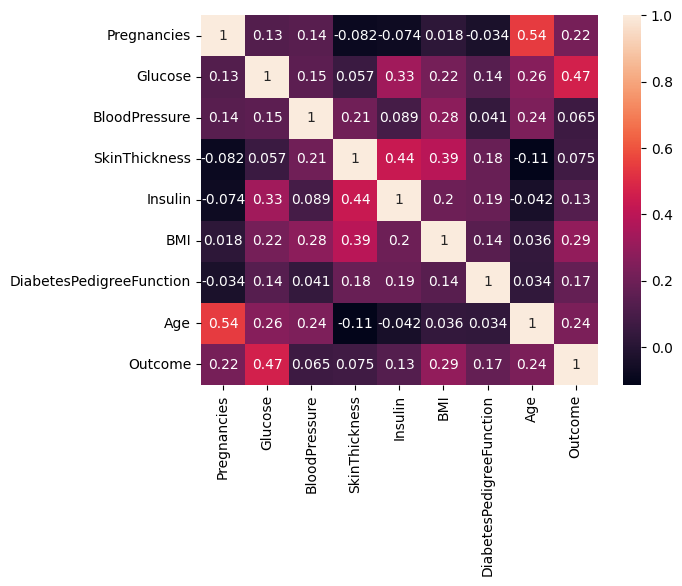

In [22]:
corr_matrix = diabetes_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

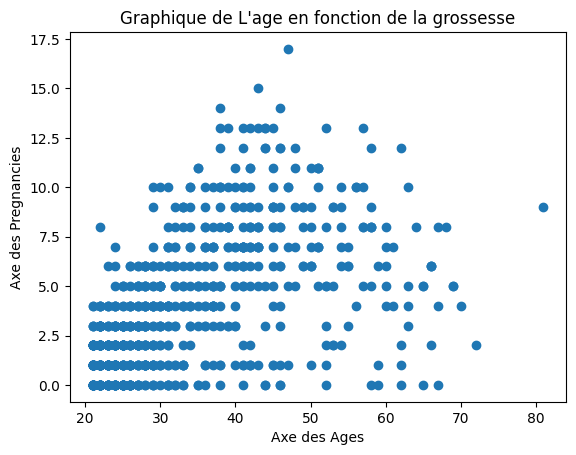

In [23]:
plt.scatter(diabetes_data.Age,diabetes_data.Pregnancies)
plt.title("Graphique de L'age en fonction de la grossesse")
plt.xlabel("Axe des Ages")
plt.ylabel("Axe des Pregnancies")
plt.show()

Let's take a look at the correlation coefficients of an important value:

1.   Between `Age` and `Pregnancies`: 0.544341
> 
  This shows us that there is a strong correlation between these two data. The graph above shows the link between pregnancy and age.

2.   Between `Insulin` and `SkinThickness` : 0.436783
> 
  This shows that there is a moderate correlation between these two data.

3.   Between `Outcome` and `Glucose`: 0.466581
> 
  This shows us that there is a moderate correlation between these two data.

***As the last two correlation coefficients are indicative of a moderate correlation, we'll take them into account in our prediction, which won't be the case for the first coefficient, so we'll ignore one of the two highly correlated data. We will therefore choose `Pregnancies` over `Age` ***.

-


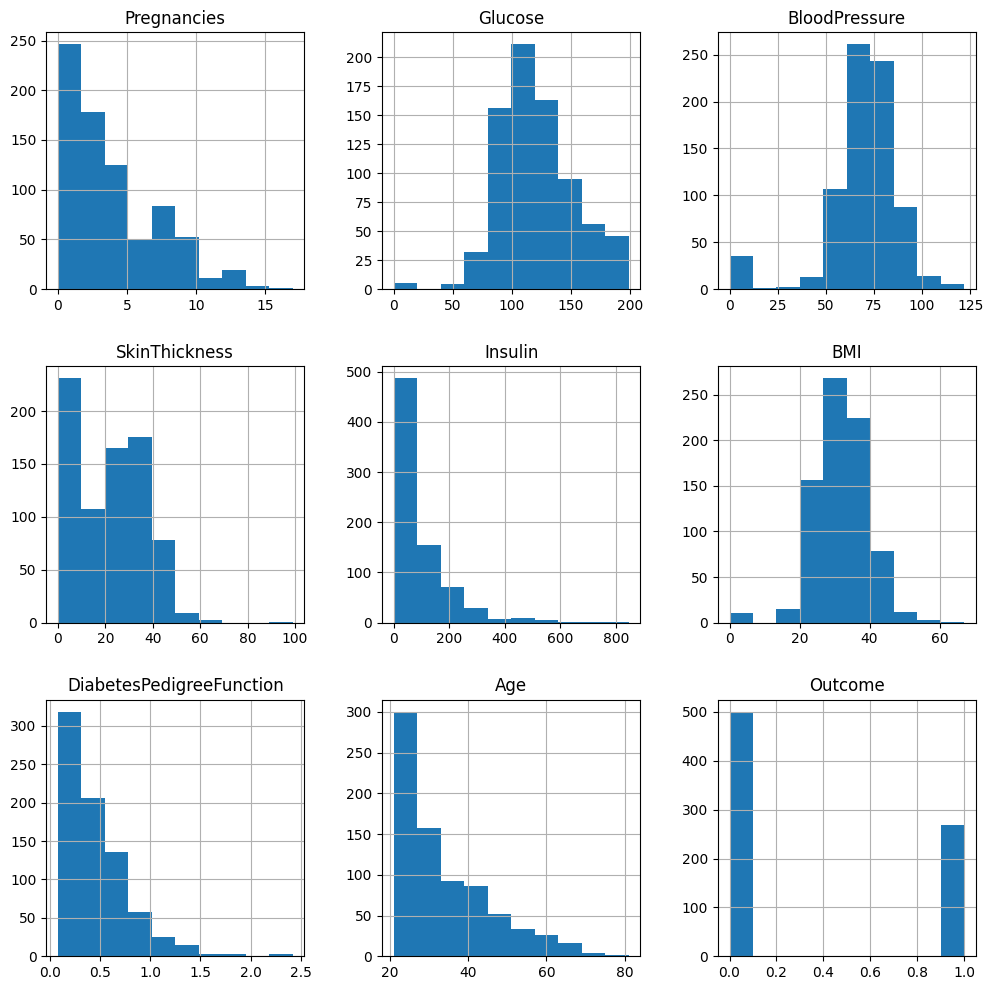

In [24]:
%matplotlib inline
plt.get_backend()
'module://ipykernel.pylab.backend_inline'
diabetes_data.hist(figsize=(12,12))
print("-")

## Targets Selection

We want to use the variable `["Outcome"]` as our dependent variable.

In [25]:
y=diabetes_data.Outcome

In [26]:
diabetes_data.drop(columns=["Outcome"],axis=1,inplace=True)

The previous line of code deletes a specific column here `["Outcome"]`. 

In [27]:
X=diabetes_data.drop(columns=["Age"],axis=1)
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000


## Data Split

Separation of data into two groups: 80% for training and 20% for validation

In [28]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

## Model Type

>>> 
  The variable to be predicted is `Outcome` which we have named y
>>>
  Let's check if it's continuous or discrete.



In [29]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

We can see that the variable to be predicted is discrete, i.e. it takes discrete values, in this case {0,1}, so we're going to use classification models.

# Classifications methods



**We will use 04 classification models**


---
>
1. `Dummy Classifier`
1. `DecisionTreeClassifier`
2. `RandomForestClassifier`
3. `XGBClassifier`








## 1 - Dummy Classifier

DummyClassifier makes predictions that ignore the input features.

This classifier serves as a simple baseline to compare against other more complex classifiers.

The specific behavior of the baseline is selected with the `strategy` parameter.

All strategies make predictions that ignore the input feature values passed as the `X` argument to `fit` and `predict`. The predictions, however, typically depend on values observed in the `y` parameter passed to `fit`.

We will use it on a **random strategy** as a bennchmark, to compare basic performance with other models

In [30]:
from collections import defaultdict

score_dict = defaultdict(int)

In [31]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

model = DummyClassifier(strategy='uniform')
model_name = model.__str__()
model.fit(train_X,train_y)
diabetes_preds1=model.predict(test_X)
tmp_score = accuracy_score(diabetes_preds1, test_y)
score_dict[model.__str__()] = tmp_score
print(tmp_score)

0.4805194805194805


The **dummies** predictions are all around 50%

Let's see if ours other models can do better!!

## 2 - DecisionTreeClassifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(random_state=0)
model.fit(train_X,train_y)
diabetes_preds1=model.predict(test_X)
tmp_score = accuracy_score(diabetes_preds1, test_y)
score_dict[model.__str__()] = tmp_score


print(tmp_score)

0.7272727272727273


## 3 - RandomForestClassifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

def get_score(model_raw, train_X,train_y,test_X,test_y, **kwargs) -> int:
  """_summary_

  Args:
      model_raw (_type_): _description_
      train_X (_type_): _description_
      train_y (_type_): _description_
      test_X (_type_): _description_
      test_y (_type_): _description_

  Returns:
      int: _description_
  """
  model=model_raw(**kwargs,random_state=0)
  model.fit(train_X,train_y)
  preds=model.predict(test_X)
  tmp_score=accuracy_score(test_y,preds)
  score_dict[model.__str__()] = tmp_score
  return tmp_score
for max_leaf in [5,50,500,2500,5000]:
  print("max_leaf : %d       score : %f "%(max_leaf,get_score(RandomForestClassifier,train_X,train_y,test_X,test_y, max_leaf_nodes=max_leaf)))

max_leaf : 5       score : 0.779221 
max_leaf : 50       score : 0.805195 
max_leaf : 500       score : 0.785714 
max_leaf : 2500       score : 0.785714 
max_leaf : 5000       score : 0.785714 


La ligne de code précédente est pour déterminer détermine le nombre maximal de feuilles dans chaque arbre de décision de la forêt aléatoire , pour avoir une idée du calibrage possible du modèle tout en regardant la possibilité d'overfitting.

Now let's modify the **n_estimators** parameter

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import accuracy_score

for n_estimate in [5,50,500,2500,5000]:
  print("n_estimate : %d       score : %f "%(n_estimate,get_score(RandomForestClassifier,train_X,train_y,test_X,test_y,n_estimators=n_estimate)))

n_estimate : 5       score : 0.753247 
n_estimate : 50       score : 0.792208 
n_estimate : 500       score : 0.792208 
n_estimate : 2500       score : 0.779221 
n_estimate : 5000       score : 0.779221 


Cette ligne-ci fait la même chose que le code d'en haut pour le n_estimators 

En fait on pourrait faire la même chose pour toutes les variables , pour tous les paramètres de RandomForestClassifier juste pour determiner quelle valeur utiliser pour un parametre donné pour avoir une meilleure prédiction. Il faut cependant prendre en compte le risque d'overfitting

In [35]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50,max_leaf_nodes=50,random_state=0)
model.fit(train_X,train_y)
diabetes_preds=model.predict(test_X)
score= accuracy_score(diabetes_preds, test_y)
score_dict[model.__str__()] = score
print(score)

0.7987012987012987


3.**XGBClassifier**

In [36]:
from xgboost import XGBClassifier
model=XGBClassifier(n_estimators=50,max_leaf_nodes=50,random_state=0)
model.fit(train_X,train_y)
diabetes_preds=model.predict(test_X)
score = accuracy_score(diabetes_preds, test_y)
print(score)
score_dict[model.__str__()] = score


0.7857142857142857


/home/femi/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:38:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)


# **Comparer les performances des modèles**

Let's print the result of our Models

In [40]:
[print(j[1] * 100, j[0]) for j in sorted(list(i for i in score_dict.items()), key=lambda x : x[1], reverse=True)]

80.51948051948052 RandomForestClassifier(max_leaf_nodes=50, random_state=0)
79.87012987012987 RandomForestClassifier(max_leaf_nodes=50, n_estimators=50, random_state=0)
79.22077922077922 RandomForestClassifier(n_estimators=50, random_state=0)
79.22077922077922 RandomForestClassifier(n_estimators=500, random_state=0)
78.57142857142857 RandomForestClassifier(max_leaf_nodes=500, random_state=0)
78.57142857142857 RandomForestClassifier(max_leaf_nodes=2500, random_state=0)
78.57142857142857 RandomForestClassifier(max_leaf_nodes=5000, random_state=0)
78.57142857142857 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
         

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

As You can see, our best model is the randomForestClassifier with an accuracy score around 80%. But can we do better ?

# Improvements

You can do some **improvements** to our code

We can figure out about adding

- Pipelines to guarantee modularity and scalability
- New Models
- Better EDA
- Cross-fit validation

## Use of Pipeline

To maintain the code and make it modulable and scalar, we will use **pipelines** for the EDA process and the model application

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

def none_function(df):
    return df

preprocessor = ColumnTransformer(
  transformers=[
    ('categorical', FunctionTransformer(none_function), ['Glucose']),
    ('grad', FunctionTransformer(none_function), ['Glucose']),
    ('num', FunctionTransformer(none_function), ['Glucose']),
  ]
)

model_arr = [{
    'model_name' : 'Random Forest', "args" : {}, "model_raw" : RandomForestClassifier
    }
]

def init_pipeline(model_arr : list[dict]) -> Pipeline:
    pipelines = []

    for model_info in model_arr:
        model_name = model_info['model_name']
        args = model_info.get('args', {})
        model = model_info['model_raw'](**args) if 'model_raw' in model_info else model_info['model_inited']
        tmp_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
        pipelines.append((model_name, tmp_pipeline))
    
    return pipelines

Then we can use a function to the predictions records

In [75]:

def fit_train_pipelines(pipelines):

    for name, p in pipelines:
        p.fit(train_X, train_y)
        preds = p.predict(test_X).astype(int)
        tmp_score=accuracy_score(test_y,preds)
        score_dict[name] = tmp_score
print(score_dict)

#[print(j[1] * 100, j[0]) for j in sorted(list(i for i in score_dict.items()), key=lambda x : x[1], reverse=True)]

{'Random Forest': 0.7207792207792207, 'Logistic Regression': 0.7857142857142857, 'Decision Tree': 0.6948051948051948, 'K-Nearest Neighbors': 0.7337662337662337, 'Support Vector Machine': 0.7662337662337663, 'XGBoost': 0.7077922077922078, 'LightGBM': 0.7207792207792207, 'CatBoost': 0.7727272727272727}


## Improve DEA

## Try others models

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_sequential_model():
    model = Sequential([
        Dense(32, activation='relu', input_dim=3),  # Première couche avec 8 entrées et 32 neurones
        Dense(16, activation='relu'), # Deuxième couche avec 16 neurones
        Dense(1, activation='sigmoid') # Couche de sortie avec une activation sigmoïde pour la classification binaire
    ])

#    model = Sequential()

# 2. Ajouter des couches
#    model.add(Dense(32, activation='relu', input_dim=8))  # Première couche avec 8 entrées et 32 neurones
#    model.add(Dense(16, activation='relu'))              # Deuxième couche avec 16 neurones
#    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',                    # Optimiseur
              loss='binary_crossentropy',          # Fonction de perte pour une classification binaire
              metrics=['accuracy'])  
    return model

model_arr = [{
    'model_name' : 'Random Forest', "args" : {}, "model_raw" : RandomForestClassifier
    },
    {"model_name": "Logistic Regression", "model_inited" : LogisticRegression(max_iter=1000)},
    {"model_name": "Decision Tree", "model_inited" : DecisionTreeClassifier()},
    {"model_name": "Random Forest", "model_inited" : RandomForestClassifier()},
    {"model_name": "K-Nearest Neighbors", "model_inited" : KNeighborsClassifier()},
    {"model_name": "Support Vector Machine", "model_inited" : SVC(probability=True)},
    {"model_name": "XGBoost", "model_inited" : XGBClassifier(use_label_encoder=False, eval_metric='logloss')},
    {"model_name": "LightGBM", "model_inited" : LGBMClassifier()},
    {"model_name": "CatBoost",  "model_inited" :CatBoostClassifier(verbose=0)},                                        
    {"model_name": "Artificial Neural Network (ANN)", "model_inited" : get_sequential_model()},
    {"model_name": "Dummy Classifier",'model_inited' : DummyClassifier(strategy='uniform')}
]

pipelines = init_pipeline(model_arr)

score_dict = {}

rel = fit_train_pipelines(pipelines)

/home/femi/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/femi/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:45:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 221, number of negative: 393
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359935 -> initscore=-0.575647
[LightGBM] [Info] Start training from score -0.575647
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Let's print the result of our new models

In [80]:
[print(j[1] * 100, j[0]) for j in sorted(list(i for i in score_dict.items()), key=lambda x : x[1], reverse=True)]

78.57142857142857 Logistic Regression
77.27272727272727 CatBoost
76.62337662337663 Support Vector Machine
73.37662337662337 K-Nearest Neighbors
72.07792207792207 LightGBM
71.42857142857143 Random Forest
70.77922077922078 XGBoost
69.48051948051948 Decision Tree
69.48051948051948 Artificial Neural Network (ANN)
52.5974025974026 Dummy Classifier


[None, None, None, None, None, None, None, None, None, None]

# Conclusion

### MERCI DE NOUS AVOIR SUIVIE






